Neste tutorial, vamos tentar entender a lógica subjacente à inferência por reamostragem *bootstrapping*. Trata-se de uma apresentação muito introdutória.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Cria parâmetros de uma distribuição de escores em um teste de inteligência

**escores ~ *N*(100, 15)**

In [8]:
# parâmetros da distribuição
media = 100
dp = 15
tamanho_amostral = 15

# definindo uma semente para replicabilidade
np.random.seed(1)

amostra = np.random.normal(100, 15, size = tamanho_amostral)

# imprime escores da amostra, média e desvio padrão
print(amostra)
print(f"Média: {np.mean(amostra):.3f}")
print(f"DP: {np.std(amostra):.3f}")

[124.36518045  90.8236538   92.07742372  83.90547067 112.98111444
  65.47691955 126.17217646  88.58189649 104.78558644  96.25944437
 121.93161906  69.09788936  95.16374194  94.23918468 117.00654164]
Média: 98.858
DP: 18.211


Vamos ver a distribuição dessa amostra

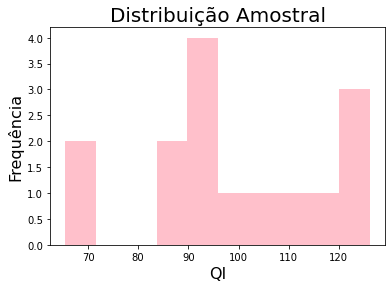

In [9]:
plt.hist(amostra, color = "pink")
plt.title("Distribuição Amostral", fontsize = 20)
plt.xlabel("QI", fontsize = 16)
plt.ylabel("Frequência", fontsize = 16)

plt.savefig('006 - Bootstrapping.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

a distribuição acima é toda estranha. Agora, vamos tratar a nossa amostra de 15 participantes como uma **minipopulação**. A partir dela, extraíremos uma amostra de 15 casos com reposição. Em outras palavras, sortearemos aleatoriamente um participante, anotaremos seu escore, devolveremos ele para a amostra, sortearemos outro, até completarmos um tamanho amostral igual ao de nossa amostra original.

Por conta desse processo probabilístico, é possível que alguns participantes não sejam representados nessa nova amostra, enquanto outros podem ser representados 2 ou mais vezes. Nessa nova amostra, podemos calcular a média e guardar esse valor.

Mais importante, podemos repetir esse procedimento milhares de vezes (digamos, 5 mil). Ao final, teremos 5 mil médias de amostras *bootstrap*. Vamos lá?

In [10]:
# define o número de simulações
n_simulacoes = 5_000 # modifique este valor, caso queira

# lista armazenará as médias de cada uma das 5 mil simulações
medias_das_amostras_bootstrap = list()

# realiza as n_simulacoes simulacoes
for simulacao in range(n_simulacoes):
    
    # amostragem com reposição: participantes são sorteados da amostra e depois devolvidos para novo sorteio
    amostra_bootstrap = np.random.choice(amostra, size = tamanho_amostral, replace = True) 
    
    # salva a média da i-ésima amostra bootstrap em uma lista
    medias_das_amostras_bootstrap.append(np.mean(amostra_bootstrap))
    
    
print("Terminamos a simulação!")


Terminamos a simulação!


Após terminarmos a simulação, vamos fazer isso e ver como é a distribuição dessas 5 mil médias?

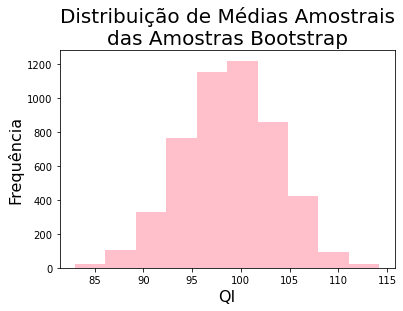

In [11]:
plt.hist(medias_das_amostras_bootstrap, color = "pink")
plt.title("Distribuição de Médias Amostrais\ndas Amostras Bootstrap", fontsize = 20)
plt.xlabel("QI", fontsize = 16)
plt.ylabel("Frequência", fontsize = 16)
plt.show()

Note que a distribuição amostral de médias das amostras *bootstrap* tem distribuição normal, mesmo que os dados originalmente fossem todos zoados. Vamos ver a média e o DP dessa distribuição amostral de médias das amostras *bootstrap*...

In [12]:
print(f"Média: {np.mean(medias_das_amostras_bootstrap):.3f}")
print(f"DP: {np.std(medias_das_amostras_bootstrap):.3f}")

# print(f"EPM: {np.std(amostra / np.sqrt(tamanho_amostral)):.3f}")

Média: 98.815
DP: 4.791


Podemos usar os valores acima para calcular intervalos de confiança. Você pode se perguntar: "mas por que não calcular ICs do jeito tradicional?"

O problema dos ICs tradicionais em nosso exemplo é que, pelo tamanho amostral ser pequeno, isso significa que a média amostral tende a variar mais de amostragem para amostragem. Isso quer dizer que há mais chances de que a média da nossa amostra, por azar, esteja mais distante da verdadeira média populacional. Os intervalos de confiança *bootstrapping*, que não se baseiam na teoria normal clássica, tendem a levar a inferências mais precisas nessas situações.

Primeiro, vamos calcular o intervalo de confiança para a média populacional com base na nossa amostra.

In [13]:
# Intervalos de confiança da amostra
print("Intervalos de confiança da amostra")
limite_inferior = np.mean(amostra) - 1.96 * np.std(amostra) / np.sqrt(10)
limite_superior = np.mean(amostra) + 1.96 * np.std(amostra) / np.sqrt(10)
print(f"IC 95% = [{limite_inferior:.3f}, {limite_superior:.3f}]")

Intervalos de confiança da amostra
IC 95% = [87.571, 110.145]


Agora, vamos repetir o procedimento, mas calculando o IC *bootstrap* percentílico.

In [14]:
# Intervalos de confiança percentílicos das amostras bootstrap
# produz ICs mais estreitos (i.e., mais precisos) que aqueles baseados na teoria normal
print("Intervalos de confiança percentílicos das amostras bootstrap")
limite_inferior_boot = np.percentile(medias_das_amostras_bootstrap, q = 2.5)
limite_superior_boot = np.percentile(medias_das_amostras_bootstrap, q = 97.5)
print(f"IC 95% percentílico = [{limite_inferior_boot:.3f}, {limite_superior_boot:.3f}]")

Intervalos de confiança percentílicos das amostras bootstrap
IC 95% percentílico = [89.154, 107.831]
